In [12]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_path = './data/'

In [4]:
aq = pd.read_hdf(data_path+'aq.hdf')

In [5]:
aq.shape

(377265, 8)

In [6]:
aq.head()

,station_id,time,PM2.5,PM10,NO2,CO,O3,SO2
0,aotizhongxin,2017-01-01 14:00:00,453.0,467.0,156.0,7.2,3.0,9.0
1,aotizhongxin,2017-01-01 15:00:00,417.0,443.0,143.0,6.8,2.0,8.0
2,aotizhongxin,2017-01-01 16:00:00,395.0,467.0,141.0,6.9,3.0,8.0
3,aotizhongxin,2017-01-01 17:00:00,420.0,484.0,139.0,7.4,3.0,9.0
4,aotizhongxin,2017-01-01 18:00:00,453.0,520.0,157.0,7.6,4.0,9.0


In [7]:
aq.isnull().any()

station_id    False
time          False
PM2.5          True
PM10           True
NO2            True
CO             True
O3             True
SO2            True
dtype: bool

In [10]:
for i, column_name in enumerate(aq.columns):
    print(column_name, ':', aq[column_name].isnull().sum(), 'missing')

station_id : 0 missing
time : 0 missing
PM2.5 : 24069 missing
PM10 : 99665 missing
NO2 : 22172 missing
CO : 46610 missing
O3 : 24337 missing
SO2 : 22102 missing


there are missing values for PM2.5, PM10, O3

In [8]:
stations = set(aq['station_id'])

In [9]:
len(stations)

35

In [13]:
aq_temp = aq.copy()
del aq['station_id'], aq['time']

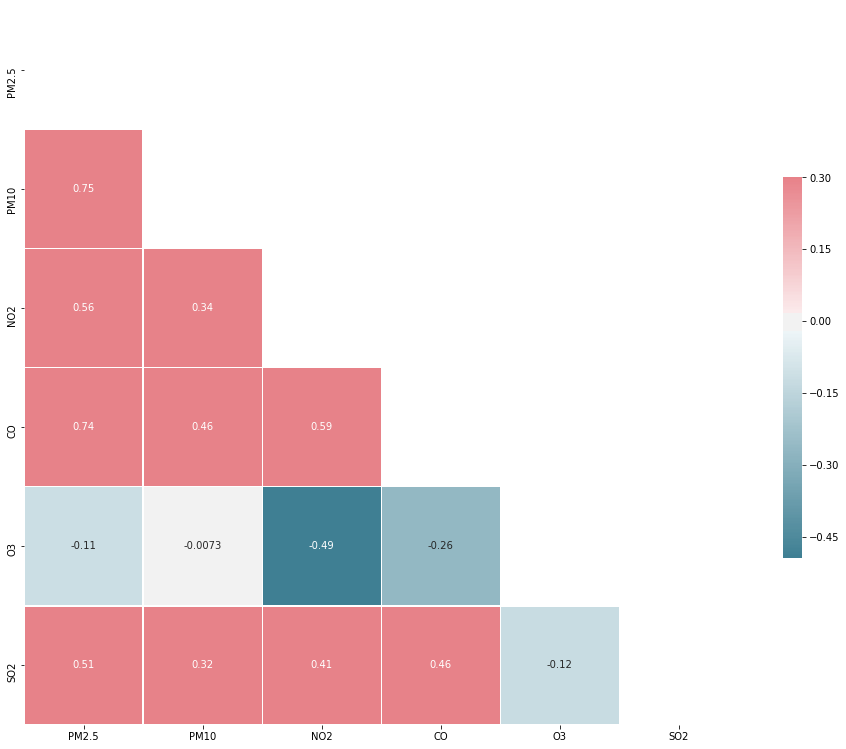

In [17]:
tempCor = aq_temp.corr()
mask = np.zeros_like(tempCor, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(16, 14))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(tempCor, annot=True, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

PM2.5 is positively correlated with PM10, and O3 is correlated with neither PM2.5 nor PM10